# CSCE 623 Homework Assignment 4

### Student Name:  HOSLEY, BRANDON

### Date: May 9, 2022

### Baseball Salary Regression in multi-feature player dataset

Instructions:
* Review all provided code before starting your work - this instructor has provided hints and tips throughout the code
* This assignment is composed of 2 parts
    * Load, split, and explore the data
    * Fit models and evaluate performance
* Complete the numbered STEPS which contain (STUDENT CODE REQUIRED) and (STUDENT MARKDOWN RESPONSE REQUIRED) activities
* Remember to restart the kernel and rerun all cells before submitting the assignment
* Submit only the Jupyter Notebook (.ipynb) file - do not submit the datasets.

In [1]:
# Note... not all of these are used...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import copy

from math import factorial

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate,  cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer


from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from sklearn.feature_selection import SequentialFeatureSelector

%matplotlib inline
plt.style.use('seaborn-white')

import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

## OPTIONAL STUDENT CODING: If you need any imports, code them below

In [2]:
######### ------- EXTRA STUDENT IMPORTS ------------


######### ------- END STUDENT IMPORTS ------------

# Part A:  Data setup and exploration

This dataset contains information about various baseball players and their salaries.  

### Load the 'ISLR_Hitters.csv' data using pandas (INSTRUCTOR CODE PROVIDED).  
* set the `index_col` to 0
* There are unknown salaries in the dataset for some players... drop any `na`s in the dataset (there will be 263 remaining rows after removing the nas)
* Ensure the index is correctly identifying each of the 263 rows from the index 0 to 262 without gaps
* Store the full dataset data in `df`
* Make the name column of the player be `Player`


In [3]:
# df = pd.read_csv('ISLR_Hitters.csv', index_col=False).dropna()
pre_df = pd.read_csv('ISLR_Hitters.csv').dropna().reset_index(drop=True)
pre_df.rename(columns={ pre_df.columns[0]: "Player" },inplace=True)
display(pre_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

None

##  STEP 1: (STUDENT CODE REQUIRED) Preprocess the categorical columns in the data using one-hot-encoding 

Notice that `League`, `Division` and `NewLeague` are non-numerical categories (stored as `object`s ) which should be converted to one-hot-encoded features.  Each of these categorical features only contains two categories, and if we created 2 one-hot features for each, using both columns would not provide any more information than using one.  Since we want to eliminate columns which provide redundant information, we only need one of the category columns to be 'hot' and if it is not (0 instead of 1), we know that the other category for that feature must be true.   

For example, we create a one-hot-encoded column `League_N` such that if the original categorical value in `League` was `N` then the one-hot-encoded column `League_N` should contain a 1, however if the categorical value in `League` was `A` then the one-hot-encoded column `League_N` should contain a 0

Create a new dataframe `df` to accomplish this for each of the three categorical features.  After completing this step, the dataset `df` should be such that
* The categorical column `League` (`A`merican or `N`ational) is represented instead with column  `League_N` which contains a 1 if `League` was `N` or a 0 if `League` was `A`
* The categorical column  `Division` (`E`ast or `W`est) is represented instead with column `Division_W` which contains a 1 if `Division` was `W` or a 0 if `Division` was `E`
* The categorical column   `NewLeague` (`A`merican or `N`ational) is represented instead with column `NewLeague_N` which contains a 1 if `NewLeague` was `N` or a 0 if `NewLeague` was `A` 
* `df` doesn't contain the original 3 categorical variables (`League`, `Division` and `NewLeague`)

Check to make sure everytyhing worked correctly.  After this step is complete there should still be 263 rows, 21 columns, and all columns except for `Player` will contain numeric information (no letters, strings, objects)


Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and the function's option `drop= 'first'` 

In [4]:
# STEP 1

df = None #placeholder


#----------------START STUDENT CODE -----------------------
df = pre_df.copy().drop(columns = ['League','Division', 'NewLeague'])

col_transformer = ColumnTransformer(transformers =[
    ('enc', OneHotEncoder(drop ='first'), ['League','Division', 'NewLeague']),
], remainder ='passthrough')

df[['League_N', 'Division_W', 'NewLeague_N']] = pd.DataFrame( col_transformer.fit_transform(pre_df[['League','Division', 'NewLeague']]) ).apply(pd.to_numeric, downcast='integer')
#df[['League_A', 'Division_E', 'NewLeague_A']] = df[['League_N', 'Division_W', 'NewLeague_N']].applymap(lambda x : [1,0][int(x)])
#df.head()
#----------------END STUDENT CODE -----------------------

In [5]:
df.info()  #confirm existence of dummies and auto-generated names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       263 non-null    object 
 1   AtBat        263 non-null    int64  
 2   Hits         263 non-null    int64  
 3   HmRun        263 non-null    int64  
 4   Runs         263 non-null    int64  
 5   RBI          263 non-null    int64  
 6   Walks        263 non-null    int64  
 7   Years        263 non-null    int64  
 8   CAtBat       263 non-null    int64  
 9   CHits        263 non-null    int64  
 10  CHmRun       263 non-null    int64  
 11  CRuns        263 non-null    int64  
 12  CRBI         263 non-null    int64  
 13  CWalks       263 non-null    int64  
 14  PutOuts      263 non-null    int64  
 15  Assists      263 non-null    int64  
 16  Errors       263 non-null    int64  
 17  Salary       263 non-null    float64
 18  League_N     263 non-null    int8   
 19  Division

### Separating features and regression target labels & test/non-test split (INSTRUCTOR CODE PROVIDED)

Next we will 
* Separate features and labels in the full dataset into X and y.
* Partition the data into test and non-test sets

In [13]:
y = pd.DataFrame( df.Salary)
# Drop the column with the independent variable (Salary)
# X = df.drop(['Salary'], axis=1).astype('float64')
X = df.drop(['Salary'], axis=1)

testfraction = 0.25
randState = 42

X_nonTest, X_test, y_nonTest, y_test = train_test_split(X, y, test_size=testfraction, random_state=randState)

In [11]:
# display the names of the features
list(X_nonTest.columns)

['Player',
 'AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'League_N',
 'Division_W',
 'NewLeague_N']

In [14]:
y_nonTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 143 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


### Explore the value of the response variable (salary)   (INSTRUCTOR CODE PROVIDED)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 143 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


None

,Salary
count,197.000000
mean,543.483442
std,445.996188
min,67.500000
25%,195.000000
50%,425.000000
75%,750.000000
max,2460.000000


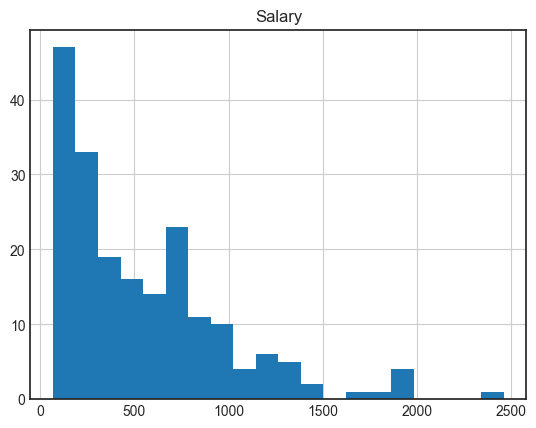

In [15]:
display(y_nonTest.info())
display(y_nonTest.describe())

y_nonTest.hist(bins=20)
plt.show()

Notice that the histogram of the response variable reveals very few observations containing higher salaries (above $1.0M).  This may cause problems when trying to predict in this range

## STEP 2: Create a new response variable by taking the log of the actual dollar salary value. (STUDENT CODE REQURIED)

* Store the value of the base-10-log of the actual dollar sallary $($ `y_nonTest` $\times1000)$ in a variable called `log_y_nonTest` using `numpy`'s  `log10` function.
* show a histogram of `log_y_nonTest`

Note that we will need to do this later for the test set y too


In [ ]:
# STEP 2

log_y_nonTest = None #placeholder

#----------------START STUDENT CODE -----------------------

#remember to use the function from numpy... not base python


#----------------END STUDENT CODE -----------------------


## STEP 3: Explore the non-test data features & select relevant features (STUDENT CODE REQUIRED)

1.  Using only the `X_nonTest` and `log_y_nonTest` data, conduct data exploration on the features
2.  Using log salary labels, compute correlations with each possible feature
3.  Select the top 7 features you think might work well for predicting player (log) salary.  Later you will be required to provide evidence supporting your beliefs 
2.  Store the column names of your selected features as a list in `best_features`.  

Suggestions:  Use `.corr` will be helpful here

In [ ]:
# STEP 3

best_features = []  #placeholder

# when exploring relationship between features and predictors, it might be useful to have a (re)combined set
xy_nontest = pd.concat([X_nonTest, log_y_nonTest], axis=1)
xy_nontest.rename(columns={"Salary":"Log10_Salary"},inplace=True)
xy_nontest.info()

#----------------START STUDENT CODE -----------------------


#----------------END STUDENT CODE -----------------------

In [ ]:
#instructor code 
print("STUDENT-SELECTED BEST FEATURES:", best_features)

## STEP 4: Evidence supporting selection of best Features  (STUDENT MARKDOWN REQUIRED)

Provide descriptions of the evidence you used to make your decisions about best features


--------------------------

<font color='green'>STUDENT ANSWER HERE STEP 4</font>


<font color='green'> 

<font color='green'>END STUDENT ANSWER</font>    
    
------------------------


###  Make a `seaborn` `pairplot` of the these 7 features that you think are most useful AND the log salary. (INSTRUCTOR-PROVIDED CODE)

(note that pairplots make take time to render - the more features you include the longer they take)  


In [ ]:
# NOTE - THIS MAKE TAKE A FEW MOMENTS TO CALCULATE & DISPLAY ON YOUR COMPUTER

#switch the below to True to show the pairsplot.
if True:
    g = sns.pairplot(data=xy_nontest, x_vars=best_features,y_vars="Log10_Salary")
    # g = sns.pairplot(data=xy_nontest, x_vars=best_features,y_vars="Salary", height=1, aspect=1.0)
    g.fig.set_size_inches(20,4)
    


## STEP 5:  Scale all X data using nonTest data scaler  (STUDENT CODE REQUIRED)
* Scale the data features since we dont want some features to affect the linear regressions differently just becasue they have different scales
* Fit the `zscaler` to the non-test data and transform the non-test data into the variable called `X_nonTest_scaled`.  Remember that we should not be using test data for this!
* then *apply* those (non-test) fitted parameters to the test data into the variable called `X_test_scaled` to preserve the scaling *without being influenced by any aspect of the test data*
* Remember to not attempt to scale non-numerical features (like `Player`) or one-hot features liek `League_N`, `Division_W` and `NewLeague_N`

Hint: when using `sklearn`'s `StandardScalar`, `.fit`, `.fit_transform`, and `.transform` will be useful here

See:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler

In [ ]:
# STEP 5

X_nonTest_scaled = None #placeholder

cols = list(X_nonTest.columns.values)
exclude_scale_cols = ['Player','League_N','Division_W','NewLeague_N']
cols_to_scale = cols.copy()
for r in exclude_scale_cols: 
    cols_to_scale.remove(r)

zscaler = StandardScaler()  #use this object to conduct the scaling in the student code block

X_nonTest_scaled = None  #placeholder
X_test_scaled = None  #placeholder


#----------------START STUDENT CODE -----------------------


#----------------END STUDENT CODE -----------------------

The following instructor eval code will report the means and standard deviations of both the nonTest data features and the testData features

HINT:  What would you expect to see as the difference in the means and stdevs between these two partitions of the data if the previous step was completed properly?

In [ ]:
# Instructor eval code
print("-Before transformation, non-test column names:\n", cols)

print("---After transformation, non-test column names:\n", list(X_nonTest_scaled.columns.values))
print("---After transformation, test column names:\n", list(X_test_scaled.columns.values))


scalingdf = pd.DataFrame({'actualNonTestMeans':zscaler.mean_ ,
                          'actualNonTestStds':zscaler.scale_,
                          'scaledMeansNonTest':X_nonTest_scaled[cols_to_scale].mean(axis=0),
                          'scaledStdsNonTest':X_nonTest_scaled[cols_to_scale].std(axis=0),
                          'scaledMeansTest':X_test_scaled[cols_to_scale].mean(axis=0),
                          'scaledStdsTest':X_test_scaled[cols_to_scale].std(axis=0)})
display(scalingdf)

### Make a prediction evaluator that accounts for the log base 10 scaled salaries (INSTRUCTOR-PROVIDED CODE)

Before we start fitting models there is one last thing we need to do.

Although the new Y values after log-10 scaling should help our model fit, it means the models predictions will be of log-10 salary (not the salary value itself).  In order to compensate for this we will build a new helper function to compute MSE on predictions which were made in the logspace.  This MSE method will be used by our model while computing the optimization equiation in search for good models.

A transform to calculate the $MSE$ in the original dataspace is shown below - and all $MSE$ values will be calculated in salary space instead of log-10 salary space.

In [ ]:
def transform_rmse(y_true, y_pred):
    ydiff = np.power(10,y_true) - np.power(10,y_pred)
    mse = np.dot(ydiff.T, ydiff)/len(ydiff)
    rmse = np.sqrt(mse)
    return -rmse

dataspace_rmse = make_scorer(transform_rmse, greater_is_better=True)  #this scorer can be used by the model

# Part B:  Building competing models with feature selection and regularization

In this next part, we will build several 'best of type' linear regression models using feature selection & regularization techniques
* Foward (stepwise) subset selection
* Backwards (stepwise) subset selection
* Ridge Regression 
* LASSO

In each model type we will use k-fold crossvalidation to make the selection of the best model from the hyper-parameter settings witin the type (number of features to keep for forward and backwards subset selection, best alpha value for each regularization type - ridge regression and LASSO).  

Once these four best of type models have been acquired and the crossval performances are known, we can pick the best model of these four types.

Then, we will retrain a single model of that winning type using *all* the non-test data and the hyper-parameter settings of the type in preparation for the next part

## STEP 6 (STUDENT CODE REQUIRED) Forward and reverse Subset Selection: Determining the greedy set of model features for each size linear regression model

In this step, you will use `sklearn.feature_selection`'s `SequentialFeatureSelector` as a model trainer.   This trainer is a good choice becasue it can produce models usine either forward or backwards subset selection, and you can tell it to build a model containing a specific number of features.

Inside a loop you will collect the models of each feasibile feature-count size to make the prediction of the `log_y_nonTest` data using all the numeric features avaialbel in the `X_nonTest_scaled` data as input for the model.  This process will involve:
* Use LinearRegression() as set to `model` for the `estimator` in `SequentialFeatureSelector`
* Use K-cross-fold validation where K is defined by the instructor in the `kfold_count` and is used to populate the `cv` parameter in `SequentialFeatureSelector`
* Use the dataspace_rmse scorer (created above) to have the `scoring` parameter minimize the RMSE score in units of actual salary dollars
* Create a separate instantiation of `SequentialFeatureSelector` to create both forward and backward models during each iteration of the loop
* Fit both the forward and backwards instantiated `SequentialFeatureSelector` using `.fit` with using features in `X_nonTest_scaled` and labels in `log_y_nonTest`
* Capture the resulting feature mask using `.get_support` 
* Use the feature mask to determine the dataframe column names to keep for each model
* Because `SequentialFeatureSelector` just provides the best features (not a fit model) we still have to fit and score a model with these features
    * Use the fit model to score the model fit on the non-test data using crossvalidation
    * Keep track of the best fitting model as the loop iterates
* Capture the overall best fit model of each type (fowards and backwards), and the cv score it achieved (RMSE) 

(Hint:  See https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)

In [ ]:
# STEP 6

model = LinearRegression()

kfold_count = 5

#select only the numeric features to use
numeric_features = X_nonTest_scaled.select_dtypes('number').columns
print(len(numeric_features),"numeric features:", numeric_features)

selected_features_forward = [] #placeholder to contain list of feature name text strings (column names)
selected_features_backward = [] #placeholder to contain list of feature name text strings (column names)

model_scores_forward = [] #placeholder to keep list of scores per fitted model (length = feature qty-1)
model_scores_backward = [] #placeholder to keep list of scores per feature-count (length = feature qty-1)

best_score_forward = np.inf #start as bad as possible, to be replaced with best score
best_score_backward = np.inf #start as bad as possible, to be replaced with best score
best_idx_forward = None #placeholder
best_idx_backward = None #placeholder

best_features_forward = None #placeholder to contain list of feature name text strings (column names)
best_features_backward = None #placeholder


for idx,num_feats in enumerate(range(1,len(numeric_features))):
    
    #----------------START STUDENT CODE -----------------------


    #----------------END STUDENT CODE -----------------------

    

In [ ]:
# instructor diagnostics 

print(model_scores_forward)
print(model_scores_backward)

feature_counts = range(1,len(model_scores_forward)+1)

greedyscoresdf = pd.DataFrame({'forward':model_scores_forward, 
                               'backward':model_scores_backward},index=feature_counts)
# greedyscoresdf.columns = ('foward','backward')
display(greedyscoresdf)
print("Best greedy feature selection models:")
print("forward:", best_idx_forward+1,"features, RMSE $",best_score_forward)
print(best_features_forward)
print("backward:",best_idx_backward+1,"features, RMSE $",best_score_backward)
print(best_features_backward)



#plot the RMSEs of the forward/backward models
plt.figure()
plt.plot(feature_counts,model_scores_forward,label='forward')
plt.plot(feature_counts,model_scores_backward,label='backward')
plt.xticks(feature_counts)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain')
plt.legend()
plt.show()

## STEP 7 (STUDENT CODE REQUIRED) Find Best Ridge Regression Model

Use RidgeCV to find the best alpha for the ridge regression of a models of  to make the prediction of the `log_y_nonTest` data using *all* the *numeric* features avaialble in the `X_nonTest_scaled` data as input for the model.  This process will involve:
    * Use K-cross-fold validation where K is defined by the instructor in the `kfold_count` and is used to populate the `cv` parameter in `RidgeCV`
    * Use the `dataspace_rmse` scorer (created above) to have the `scoring` parameter minimize the RMSE score in units of actual salary dollars
    * set `store_cv_values=True` in order to save the CV scores obtained for each `alpha` evaluated during CV
* Fit the instantiated `RidgeCV` using `.fit` with using features in `X_nonTest_scaled` and labels in `log_y_nonTest`

* Use Ridge() as set to `model` for the `estimator` in `RidgeCV`
* Capture the resulting best alpha using `.alpha_` 
* Fit a new model with this alpha to compute the RMSE score of the best `RidgeCV` model using the `dataspace_rmse` scorer

See:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html?highlight=ridgecv#sklearn.linear_model.RidgeCV


In [ ]:
# STEP 7

kfold_count = 5
minLogAlpha = -3
maxLogAlpha = 7
alphaCount = 1000

alphagrid = np.zeros(alphaCount)  # placeholder for the alphas
alphagrid = np.logspace(minLogAlpha,maxLogAlpha,num=alphaCount)

best_ridge_alpha = None # placeholder
best_ridge_score = None # placeholder


#------------- START STUDENT CODE ------------------


#------------- END STUDENT CODE ------------------

In [ ]:
#instructor diagnostics

print("Best Ridge alpha:", best_ridge_alpha, "; Best ridge RMSE $", best_ridge_score)


## STEP 8 (STUDENT CODE REQUIRED) Find Best LASSO Regression Model

Lasso behaves differently from Ridge Regression, and if we want to use cross validation RMSE $ as a scoring function we have to accomplish crossvalidation in a different way - by using a generalized wrapper to conduct CV.   Using a generalized wrapper in this way provides some extra functionality in conducting CV over multiple hyperparameter searches and capturing the resulting best models, parameters and performance information.  It may be a wise choice for future efforts...

Use Lasso within `GridSearchCV` to find the best alpha for the Lasso regression of a models of  to make the prediction of the `log_y_nonTest` data using *all* the *numeric* features avaialble in the `X_nonTest_scaled` data as input for the model.  This process will involve:
* Wrapping a Lasso() estimator inside of a `GridSearchCV()` object
    * Setting the `estimator` of GridSearchCV to be `Lasso()`
    * Establishing a param_grid dictionary for `GridSearchCV` which contains the logspace set of `alpha` parameters (`alphagrid`)
    * Using `dataspace_rmse` as the scoring function for the `GridSearchCV`
    * Using K-cross-fold validation where K is defined by the instructor in the `kfold_count` and is used to populate the `cv` parameter in `GridSearchCV`
* Fit the instantiated `GridSearchCV` using `.fit` with the numeric features in `X_nonTest_scaled` and labels in `log_y_nonTest`
* Capture the best lasso regularization alpha using `best_params.alpha_` 
* Capture the resulting best score of that model using `best_score_` 
* Capture extended details of the CV process as a dataframe using `.cv_results_`

(Hint:  See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [ ]:
# STEP 8

minLogAlpha = -3
maxLogAlpha = 7
alphaCount = 1000

alphagrid = np.zeros(alphaCount)  # placeholder for the alphas
alphagrid = np.logspace(minLogAlpha,maxLogAlpha,num=alphaCount)

lcv_model = None #placeholder for GridSearchCV() wrapper of Lasso() model
best_lasso_alpha = None  #placeholder
best_lasso_score = None  #placeholder

lasso_cv_results = pd.DataFrame() #placeholder

#------------- START STUDENT CODE ------------------


#------------- END STUDENT CODE ------------------

In [ ]:
#instructor diagnostics

print("best Lasso alpha:",best_lasso_alpha, "; best Lasso score:",best_lasso_score)
display(lasso_cv_results)
plt.figure()
plt.semilogx(lasso_cv_results.param_alpha,-lasso_cv_results.mean_test_score)
plt.xlabel('alpha (logscale)')
plt.ylabel('RMSE $')
plt.show()

## STEP 9 (STUDENT CODE REQUIRED)  Select the best performing model of all the models and refit on *all non-test data*

1. In the code block below, re-summarize the  CV performance and hyperparameter settings of each model (via prints or displaying dataframes) 

2.  Then, for the best performing model, store the fitted model in `best_model`  
    * dont forget that if your best model is foward or backwards selection, you must subset the features when you use the test data for prediction (STEP 10)
    * refit the model to *all* the non-test (scaled) data


In [ ]:
# STEP 9

#------------- START STUDENT CODE ------------------


#------------- END STUDENT CODE ------------------


## STEP 10 (STUDENT CODE REQUIRED) Compute the RMSE performance of the best model on the test set data


In [ ]:
# STEP 10

log_y_test=np.log10(y_test*1000) #transform test data actual salaries into log form of $

#------------- START STUDENT CODE ------------------


#------------- END STUDENT CODE ------------------


print("Test Set Salary RMSE in dollars:",test_rmse)

## STEP 11 (STUDENT CODE REQUIRED) Make a residuals scatterplot of the predictions 

Make 2 plots
* A plot which shows Acutal Salary in dollars on the horizontal axis and predicted salary in dollars on the vertical axis.  Include a diagonal line showing ideal predictions
* A residuals plot which shows actual salary in dollars on horizontal axis, and the residual dollars (actual dollars minus predicted dollars) on the vertical axis 

Remember that *actual* salary ranges from under $100K to ~$2.5M... your plots should reflect this range  (not the log of it)

In [ ]:
# STEP 11

#------------- START STUDENT CODE ------------------


#------------- END STUDENT CODE ------------------


## STEP 12 (STUDENT MARKDOWN REQUIRED - Impact of using this model

In the markdown cell below, 
* Describe the residuals behavior as a function of actual salary (Hint: see section 3.3.3 in ISLR "Potential Problems"
* Describe the pros and cons of the residuals with respect to things like 
    * Overpaying or underpaying salaries of prospective players with similar attributes
    * What kinds of salary ranges are likely to get overpaid (or underpaid)

Note:  Use the coding scrap area below to compute things if you wish that will support the markdown in the cell below

OPTIONAL/FUN:  Assuming this model is correct, figure out which named players are getting severly underpaid or overpaid and see if you agree with the model instead of their actual salary!


In [ ]:
# Coding Scrap area for addtional analysis for STEP 12 - optional

# --------------START SCRAP -----------------------




# --------------END SCRAP -----------------------


<font color='green'>STUDENT ANSWER HERE FOR STEP 12</font>

--------------------------

<font color='green'>...words go here....
    
<font color='green'>

--------------------------

<font color='green'>END STUDENT ANSWER </font>



# OPTIONAL:  Build a better model and provide RMSE and residuals

* Can you outperform the best model you provided above?
* Can you get better behavior in residuals?

Hint:  Maybe constraining ourselves to linear functions of the input features are limiting our performance.